## Plots

## Introduction
Goal is increasing the profit.
Two option:
- decreasing the cost (sample: sales chanel. Assumption: agent is more costly than web)
- increasing the profit (focusing on people with high salary or there is no correlation between them. 

##### Lets divide data in two: Numerical and categorical

In [116]:
import numpy as np
import pandas as pd

def loading_data():
    file1 = pd.read_csv('file1.csv')
    file1.rename(columns = {'ST':'State'}, inplace = True)
    file1.rename(columns = {'GENDER':'Gender'}, inplace = True)
    file2 = pd.read_csv('file2.csv')
    file2.rename(columns = {'ST':'State'}, inplace = True)
    file2.rename(columns = {'GENDER':'Gender'}, inplace = True)
    file3 = pd.read_csv('file3.csv')
    return pd.concat([file1, file2, file3], axis = 0)

In [117]:
marketing_df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')

In [118]:
numerical = marketing_df.select_dtypes(include=[np.number])
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [119]:
categorical = marketing_df.select_dtypes(include=[np.object])
categorical

/var/folders/8w/ffbmg1l958n0dtswfb_xw04c0000gn/T/ipykernel_3350/115301610.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = marketing_df.select_dtypes(include=[np.object])


,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


### Looking at the distribution (Normality)

<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

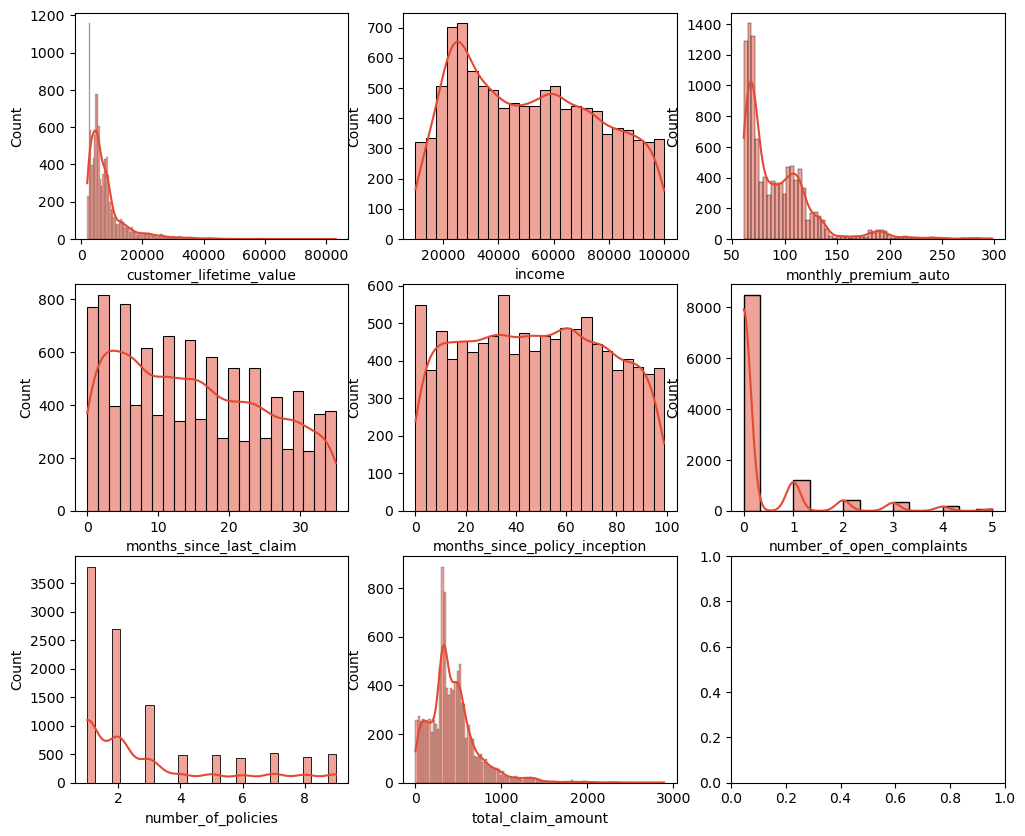

In [120]:
fig,axes = plt.subplots(3,3,figsize = (12,10))

sns.histplot(data=numerical["customer_lifetime_value"], ax=axes[0,0], kde = True)
sns.histplot(data=numerical["income"], ax=axes[0,1],kde = True)
sns.histplot(data=numerical["monthly_premium_auto"], ax=axes[0,2], kde = True)
sns.histplot(data=numerical["months_since_last_claim"], ax=axes[1,0], kde = True)
sns.histplot(data=numerical["months_since_policy_inception"], ax=axes[1,1], kde = True)
sns.histplot(data=numerical["number_of_open_complaints"], ax=axes[1,2], kde = True)
sns.histplot(data=numerical["number_of_policies"], ax=axes[2,0], kde = True)
sns.histplot(data=numerical["total_claim_amount"], ax=axes[2,1], kde = True)

Appearantly the normality is positive skew customer_life_time_value, total_claim_amunt, monthly_premium_auto.


array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

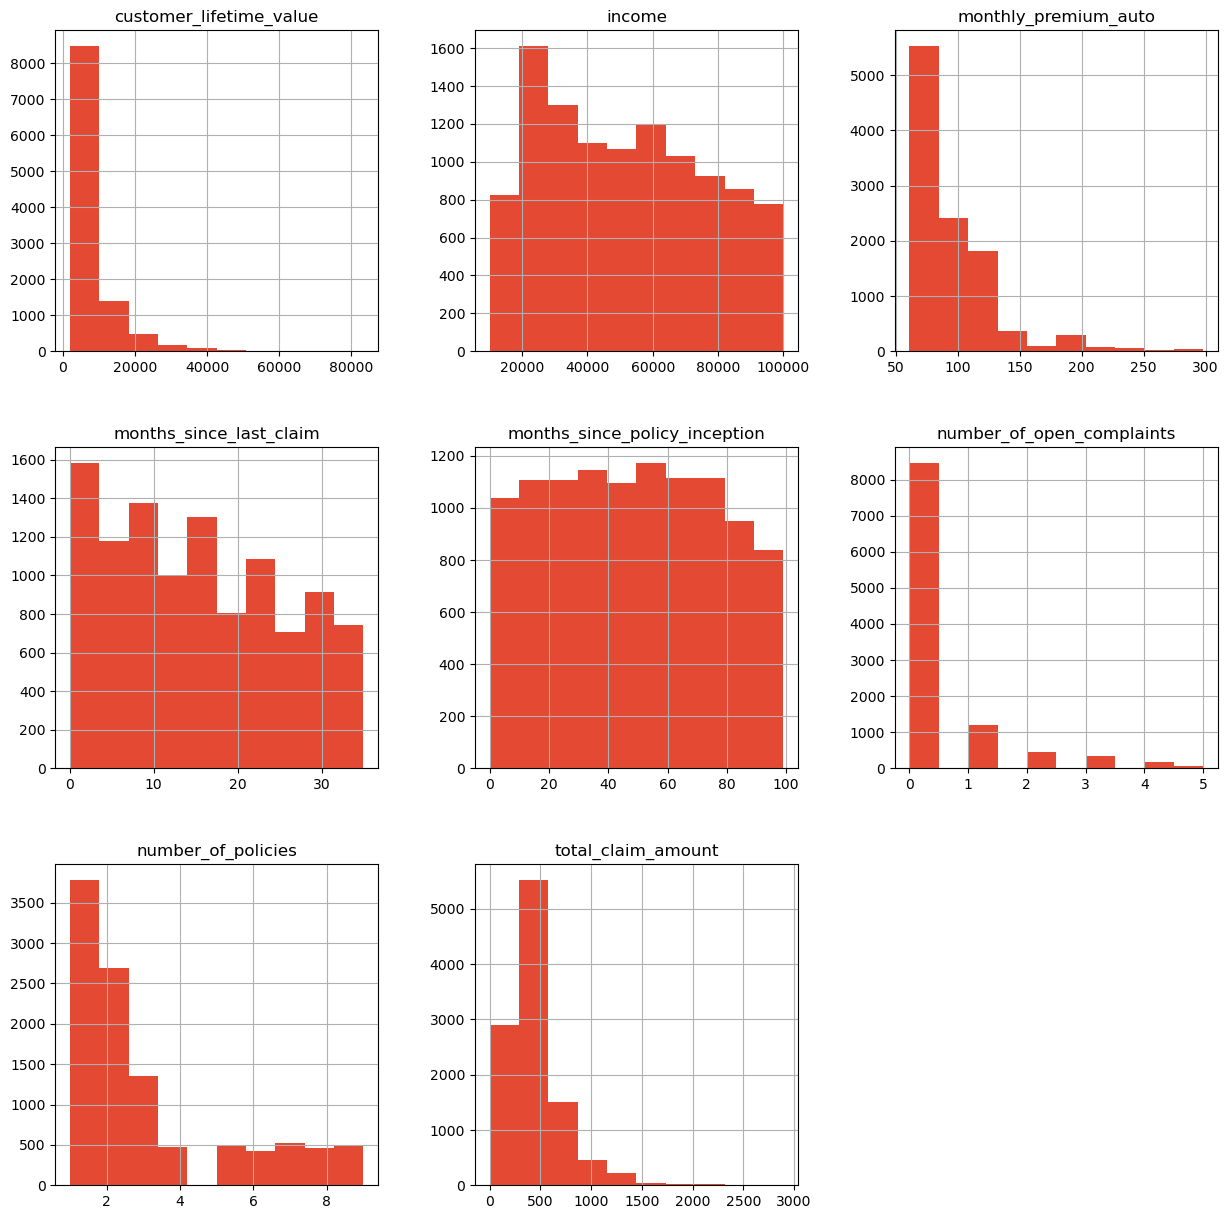

In [121]:
numerical.hist(figsize=(15,15))

<AxesSubplot:>

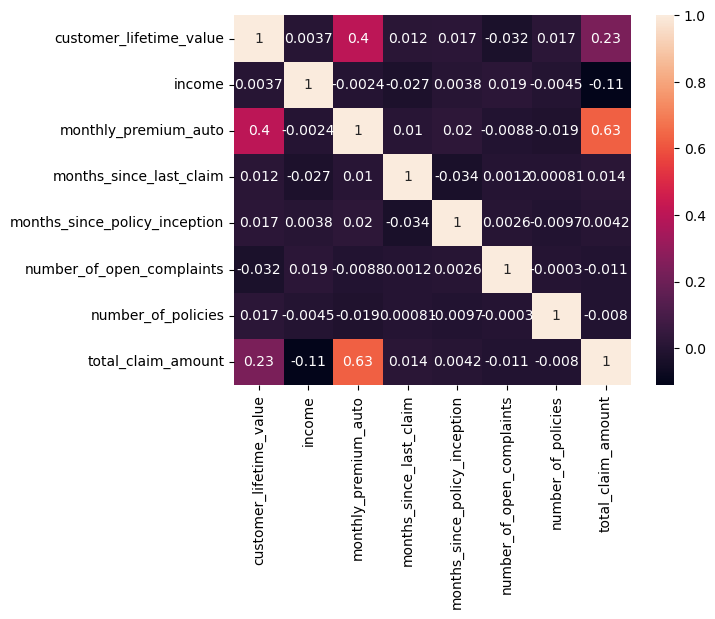

In [122]:
sns.heatmap(numerical.corr(), annot = True)

There is a strength of relationship between total_claim_amount and monthy_premium_amount. On the other hand, which is an important insight for us is there is no strength of relationship between total_claim_amount and income. 

In [123]:
### Lets evaluate 'response'

In [124]:
response = categorical['response'].value_counts()
response

no     9316
yes    1373
Name: response, dtype: int64

### Challenges:
There is many featutres. 
Which one is more effective?
Goal is not very general. 
Time-management

In [125]:
sales = categorical['sales_channel'].value_counts()
sales

agent          4019
branch         2975
call center    2099
web            1596
Name: sales_channel, dtype: int64

<AxesSubplot:title={'center':'Response by sales channel'}, xlabel='sales_channel', ylabel='count'>

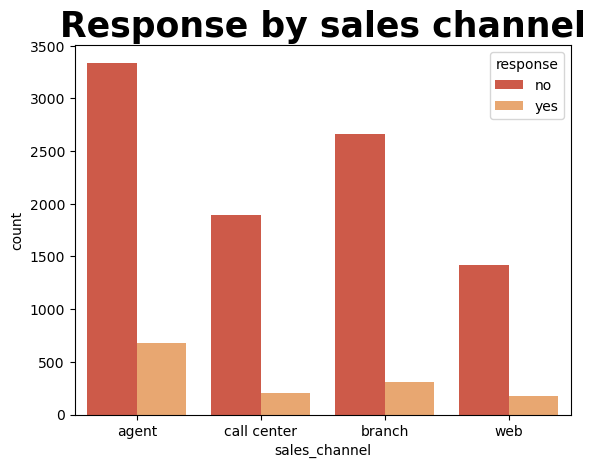

In [126]:
sns.set_palette('RdYlGn')
palette_alive = {"yes": "C5", "no": "C0"}
plt.title('Response by sales channel', size='25', fontweight='bold')
sns.countplot(data = categorical, x = 'sales_channel', hue = 'response')

1. Majorty of the responses and 'Yes' response were receveid from agent. 
2. The second one is branch, the third one is call center and the last one is web. 
3. There is pozitif corrrelation between the number of 'Yes' resonse and the number of the responses.
Lets assume that we are investing more money on branch and less money on web. In other word, agens is most costly to us and web is least costly to us.
We can reach out most people via agent and agent has the highest proportion of 'Yes'.
We can reach out least people via web and the web has the lowest proportion of 'Yes'.
According to the different proportion of 'Yes' and 'No' and also total claim amount, web is more profitable for ys(Of course it should be first compared cost of agent and ost of web with another data set.)

In [127]:
total_claim = numerical['total_claim_amount'].value_counts()
total_claim

316     147
292     143
350     137
312     128
331     123
       ... 
816       1
1980      1
1543      1
1562      1
1621      1
Name: total_claim_amount, Length: 1172, dtype: int64

In [128]:
max(numerical['total_claim_amount'])

2893

In [129]:
min(numerical['total_claim_amount'])

0

In [130]:
numerical['total_claim_amount'].mean()

434.22724296005237

<AxesSubplot:title={'center':'Response by total claim amount'}, xlabel='total_claim_amount', ylabel='count'>

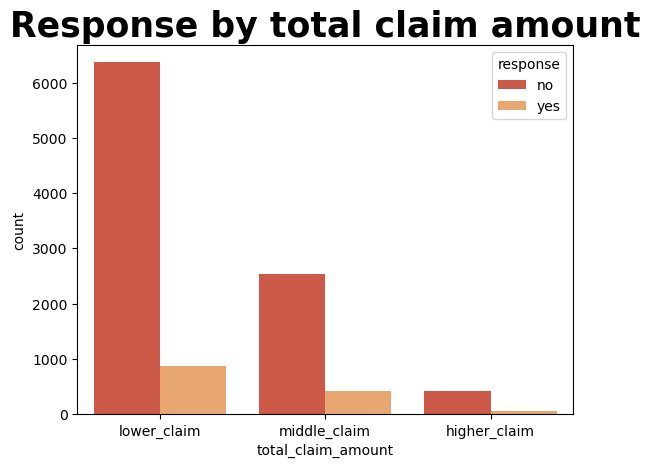

In [131]:
total_claim=[]
for x in numerical.total_claim_amount:
    if x<500:
        total_claim.append("lower_claim")
    elif 500<=x<1000:
        total_claim.append("middle_claim")
    else:
        total_claim.append("higher_claim")
        
categorical["total_claim_amount"] = total_claim

sns.set_palette('RdYlGn')
palette_alive = {"yes": "C5", "no": "C0"}
plt.title('Response by total claim amount', size='25', fontweight='bold')
sns.countplot(data = categorical, x = 'total_claim_amount', hue = 'response')

1. The people who have lower claim, has the highest number of 'Yes' response. 
2. The people who have higher claim, has the lowest number of ' Yes' response.
The difference between Yes and No on lower_claim is the biggest. 
The difference between Yes and No on higher_claim is the least. 

<AxesSubplot:title={'center':'Income level by total claim amount'}, xlabel='income_level', ylabel='count'>

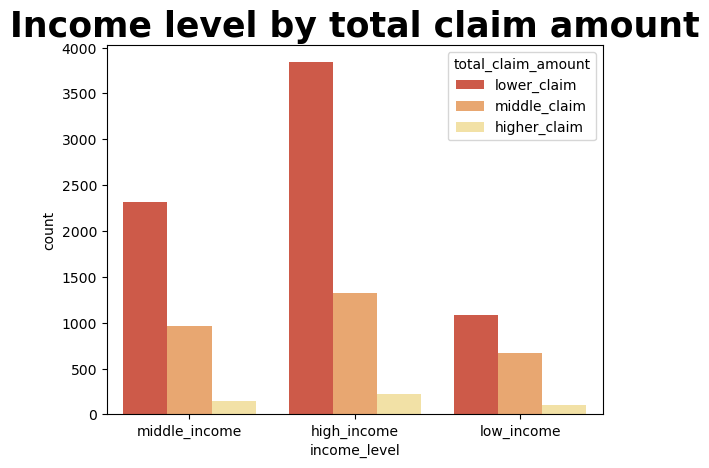

In [132]:
income_list=[]
for x in numerical.income:
    if x<25000:
        income_list.append("low_income")
    elif 25000<=x<50000:
        income_list.append("middle_income")
    else:
        income_list.append("high_income")
        
categorical["income_level"] = income_list
plt.title('Income level by total claim amount', size='25', fontweight='bold')
sns.countplot(data=categorical, x= 'income_level', hue = 'total_claim_amount') 


1. The highest income has more "Yes"
2. the number of 'Yes' is almost same in middle and low income but the low income is the least. 
3. Should we focus on people who have low and mid level income to get more profit or we try to get more people have the high level income?

<AxesSubplot:title={'center':'Response by income level'}, xlabel='income_level', ylabel='count'>

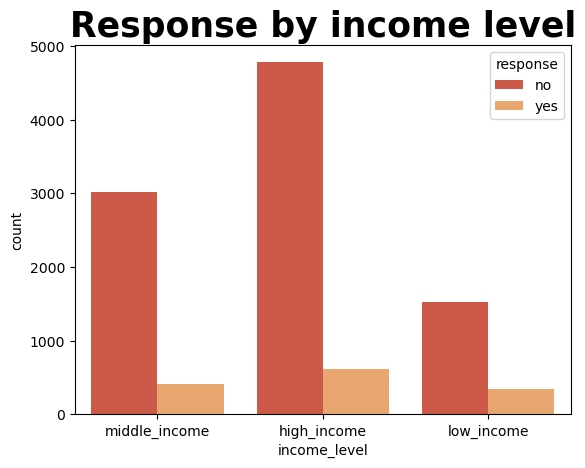

In [133]:
income_list=[]
for x in numerical.income:
    if x<25000:
        income_list.append("low_income")
    elif 25000<=x<50000:
        income_list.append("middle_income")
    else:
        income_list.append("high_income")
        
categorical["income_level"] = income_list

sns.set_palette('RdYlGn')
palette_alive = {"yes": "C5", "no": "C0"}
plt.title('Response by income level', size='25', fontweight='bold')
sns.countplot(data = categorical, x = 'income_level', hue = 'response')

### Conclusion:
Apperantly it is better to focus on people with low level income and reac out people via web. 